In [40]:
import qiskit
from qiskit import QuantumCircuit

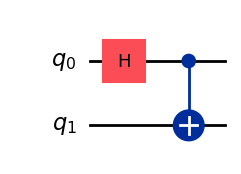

In [70]:
qc = QuantumCircuit(2)

qc.h(0)
qc.cx(0,1)

qc.draw(output='mpl')

In [42]:
from qiskit.quantum_info import Pauli

ZZ = Pauli('ZZ')
ZI = Pauli('ZI')
IZ = Pauli('IZ')
XX = Pauli('XX')
XI = Pauli('XI')
IX = Pauli('IX')
ZX = Pauli('ZX')

observables = [ZZ, ZI, IZ, XX, XI, IX, ZX]

In [43]:
from qiskit_aer.primitives import Estimator

estimator = Estimator()

job = estimator.run([qc] * len(observables), observables)

job.result()

EstimatorResult(values=array([ 1.        ,  0.01757812,  0.01757812,  1.        ,  0.03710938,
        0.03710938, -0.0390625 ]), metadata=[{'shots': 1024, 'variance': 0.0, 'simulator_metadata': [{'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'time_taken': 0.0073696, 'sample_measure_time': 0.0009751, 'input_qubit_map': [[0, 0], [1, 1]], 'max_memory_mb': 16297, 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 16, 'runtime_parameter_bind': False, 'num_bind_params': 1, 'fusion': {'enabled': False}}]}, {'shots': 1024, 'variance': 0.9996910095214844, 'simulator_metadata': [{'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'time_taken': 0.0073696, 'sample_measure_

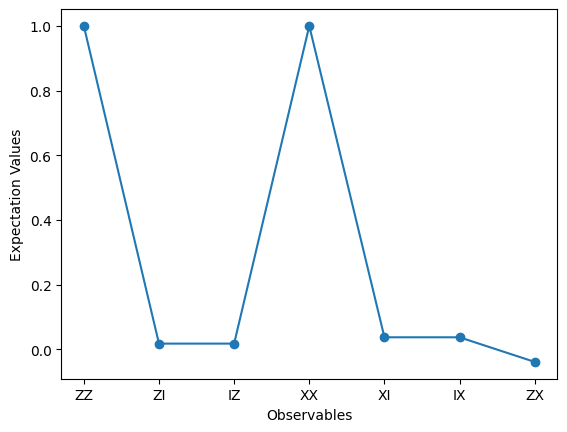

In [44]:
import matplotlib.pyplot as plt

data = ['ZZ', 'ZI', 'IZ', 'XX', 'XI', 'IX', 'ZX']
values = job.result().values

plt.plot(data, values, '-o')
plt.xlabel('Observables')
plt.ylabel('Expectation Values')
plt.show()

In [120]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, SparsePauliOp
from qiskit_aer.primitives import Estimator
import numpy as np

# Step 1: Define vectors and normalize
x = np.array([1, 1])  # Example vector
y = np.array([1, 1])  # Example vector

x_norm = x / np.linalg.norm(x)
y_norm = y / np.linalg.norm(y)

# Step 2: Encoding function
def encode_vector(vector):
    # Convert normalized vector into quantum state
    theta = 2 * np.arccos(vector[0])
    qc = QuantumCircuit(1)
    qc.ry(theta, 0)  # Apply Ry rotation
    state = Statevector.from_label('0').evolve(qc)  # Apply circuit to statevector
    return state

# Step 3: Prepare quantum states
state_x = encode_vector(x_norm)
state_y = encode_vector(y_norm)

# Step 4: Construct SWAP test circuit
qc = QuantumCircuit(3)  # 3 qubits: 1 ancilla + 2 data qubits
qc.h(0)  # Hadamard on ancilla

# Initialize the data qubits with the prepared quantum states
qc.initialize(state_x.data, 1)  # Initialize qubit 1 with state_x
qc.initialize(state_y.data, 2)  # Initialize qubit 2 with state_y

qc.cswap(0, 1, 2)  # Controlled SWAP between |ψ⟩ and |φ⟩
qc.h(0)  # Hadamard on ancilla

# Step 5: Define observable and run Estimator
observable = SparsePauliOp.from_list([("ZII", 1)])  # |0⟩⟨0| measurement on ancilla
estimator = Estimator()

# Evaluate the probability of |0⟩ on the ancilla
job = estimator.run([qc], [observable])
result = job.result()

# Step 6: Calculate overlap and Euclidean distance
prob_0 = (1 + result.values[0]) / 2  # Convert expectation value to probability
overlap = 2 * prob_0 - 1
euclidean_distance = np.sqrt(1 - overlap)

# Step 7: Print results
print(f"Probability of |0>: {prob_0}")
print(f"Overlap: {overlap}")
print(f"Euclidean Distance: {euclidean_distance}")

Probability of |0>: 0.498046875
Overlap: -0.00390625
Euclidean Distance: 1.0019512213675874


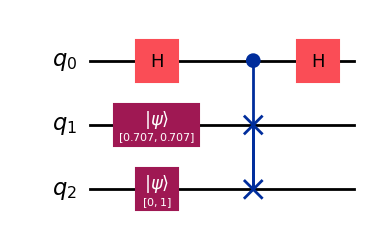

In [58]:
qc.draw(output='mpl')